# Introduction

In this project, you will build a neural network of your own design to evaluate the MNIST dataset.

Some of the benchmark results on MNIST include can be found [on Yann LeCun's page](https://webcache.googleusercontent.com/search?q=cache:stAVPik6onEJ:yann.lecun.com/exdb/mnist) and include:

88% [Lecun et al., 1998](https://hal.science/hal-03926082/document)

95.3% [Lecun et al., 1998](https://hal.science/hal-03926082v1/document)

99.65% [Ciresan et al., 2011](http://people.idsia.ch/~juergen/ijcai2011.pdf)


MNIST is a great dataset for sanity checking your models, since the accuracy levels achieved by large convolutional neural networks and small linear models are both quite high. This makes it important to be familiar with the data.

## Installation

In [1]:
# Update the PATH to include the user installation directory. 
import os
os.environ['PATH'] = f"{os.environ['PATH']}:/root/.local/bin"

# Restart the Kernel before you move on to the next step.

#### Important: Restart the Kernel before you move on to the next step.

In [2]:
# Install requirements
!python -m pip install -r requirements.txt

Defaulting to user installation because normal site-packages is not writeable


## Imports

In [3]:
## This cell contains the essential imports you will need – DO NOT CHANGE THE CONTENTS! ##
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
from torch.utils.data import DataLoader, random_split
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
from torchvision import datasets

## Load the Dataset

Specify your transforms as a list if you intend to .
The transforms module is already loaded as `transforms`.

MNIST is fortunately included in the torchvision module.
Then, you can create your dataset using the `MNIST` object from `torchvision.datasets` ([the documentation is available here](https://pytorch.org/vision/stable/datasets.html#mnist)).
Make sure to specify `download=True`! 

Once your dataset is created, you'll also need to define a `DataLoader` from the `torch.utils.data` module for both the train and the test set.

In [4]:
# Define transforms
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5),(0.5))
])
# Create training set and define training dataloader
train_dataset = datasets.MNIST(root='data', train=True, download=True, transform=transform)
train_loader = DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)

# Define the sizes for the training (80%) and validation (20%) sets.
train_split_percentage = 0.8
train_size = int(len(train_dataset) * train_split_percentage)
validation_size = len(train_dataset) - train_size
train_dataset, validation_dataset = random_split(train_dataset, [train_size, validation_size])
validation_loader = DataLoader(validation_dataset, batch_size=64, shuffle=False)

# Create test set and define test dataloader
test_dataset = datasets.MNIST(root='data', train=False, download=True, transform=transform)
test_loader = DataLoader(dataset=test_dataset, batch_size=64, shuffle=False)

## Justify your preprocessing

In your own words, why did you choose the transforms you chose? If you didn't use any preprocessing steps, why not?

Since neural networks in PyTorch work with tensors, converting the images to tensors using transforms.ToTensor() is a fundamental preprocessing step.
Normalizing the data improves the performance and stability of the neural network training.

## Explore the Dataset
Using matplotlib, numpy, and torch, explore the dimensions of your data.

You can view images using the `show5` function defined below – it takes a data loader as an argument.
Remember that normalized images will look really weird to you! You may want to try changing your transforms to view images.
Typically using no transforms other than `toTensor()` works well for viewing – but not as well for training your network.
If `show5` doesn't work, go back and check your code for creating your data loaders and your training/test sets.

In [5]:
## This cell contains a function for showing 5 images from a dataloader – DO NOT CHANGE THE CONTENTS! ##
def show5(img_loader):
    dataiter = iter(img_loader)
    
    batch = next(dataiter)
    labels = batch[1][0:5]
    images = batch[0][0:5]
    for i in range(5):
        print(int(labels[i].detach()))
    
        image = images[i].numpy()
        plt.imshow(image.T.squeeze().T)
        plt.show()

2


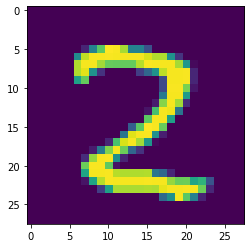

6


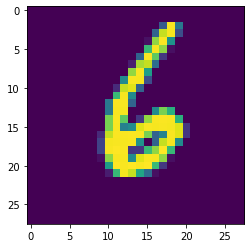

3


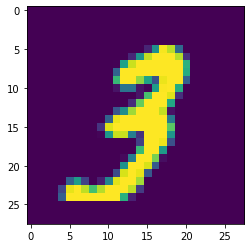

7


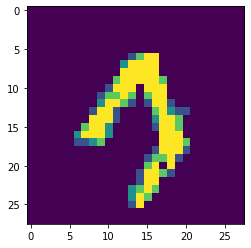

4


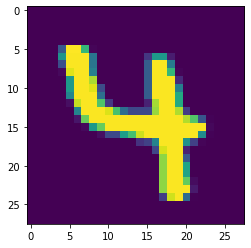

In [6]:
# Explore data
show5(train_loader)

## Build your Neural Network
Using the layers in `torch.nn` (which has been imported as `nn`) and the `torch.nn.functional` module (imported as `F`), construct a neural network based on the parameters of the dataset.
Use any architecture you like. 

*Note*: If you did not flatten your tensors in your transforms or as part of your preprocessing and you are using only `Linear` layers, make sure to use the `Flatten` layer in your network!

In [7]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 128)
        self.fc2 = nn.Linear(128, 64)
        self.out = nn.Linear(64, 10)

    def forward(self, x):
        x = x.view(-1, 28 * 28)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.out(x)
        return x
    
model = Net()

Specify a loss function and an optimizer, and instantiate the model.

If you use a less common loss function, please note why you chose that loss function in a comment.

In [8]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

## Running your Neural Network
Use whatever method you like to train your neural network, and ensure you record the average loss at each epoch. 
Don't forget to use `torch.device()` and the `.to()` method for both your model and your data if you are using GPU!

If you want to print your loss **during** each epoch, you can use the `enumerate` function and print the loss after a set number of batches. 250 batches works well for most people!

In [9]:
num_epoch = 5
train_loss_history = list()

for epoch in range(num_epoch):
    model.train()
    running_loss = 0.0
    train_correct = 0
    for i, data in enumerate(train_loader):
        inputs, labels = data
        optimizer.zero_grad() # Zero the gradients
        outputs = model(inputs) # Forward pass
        loss = criterion(outputs, labels) # Compute loss
        loss.backward() # Backward pass
        optimizer.step() # Update weights
        
        # Compute the accuracy and loss.
        _, preds = torch.max(outputs.data, 1)
        train_correct += (preds == labels).sum().item()
        running_loss += loss.item()
        
        # Compute the accuracy and loss.
    train_accuracy_percent = (train_correct/len(train_loader.dataset))*100
    train_loss_percent = (running_loss/len(train_loader.dataset))*100
    
    train_loss_history.append(train_loss_percent)
        
    print(f'Epoch {epoch + 1}, Loss: {running_loss / len(train_loader)}')

print('Finished Training')

Epoch 1, Loss: 0.39840515265300835
Epoch 2, Loss: 0.19129366379604537
Epoch 3, Loss: 0.14278017836950543
Epoch 4, Loss: 0.11737568918337572
Epoch 5, Loss: 0.09798703760679152
Finished Training


In [13]:
val_loss_history = list()

for epoch in range(num_epoch):
    val_loss = 0.0
    val_correct = 0
    model.eval()
    for i, data in enumerate(validation_loader):
        inputs, labels = data
        outputs = model(inputs) # Forward pass
        loss = criterion(outputs, labels) # Compute loss
        
        # Compute the accuracy and loss.
        _, preds = torch.max(outputs.data, 1)
        val_correct += (preds == labels).sum().item()
        val_loss += loss.item()
    
    # Compute the accuracy and loss.
    validation_accuracy_percent = (val_correct/len(validation_loader.dataset))*100
    validation_loss_percent = (val_loss/len(validation_loader.dataset))*100
    val_loss_history.append(validation_loss_percent)
    
    print(f'Epoch {epoch + 1}, Loss: {val_loss / len(validation_loader)}')

Epoch 1, Loss: 0.07511545465317891
Epoch 2, Loss: 0.07511545465317891
Epoch 3, Loss: 0.07511545465317891
Epoch 4, Loss: 0.07511545465317891
Epoch 5, Loss: 0.07511545465317891


Plot the training loss (and validation loss/accuracy, if recorded).

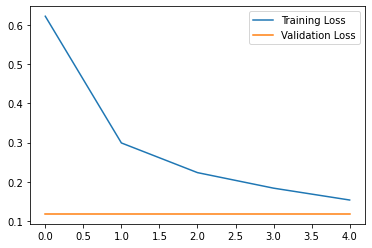

In [12]:
plt.plot(train_loss_history, label="Training Loss")
plt.plot(val_loss_history, label="Validation Loss")
plt.legend()
plt.show()

## Testing your model
Using the previously created `DataLoader` for the test set, compute the percentage of correct predictions using the highest probability prediction. 

If your accuracy is over 90%, great work, but see if you can push a bit further! 
If your accuracy is under 90%, you'll need to make improvements.
Go back and check your model architecture, loss function, and optimizer to make sure they're appropriate for an image classification task.

In [ ]:
test_loss = 0.0
test_correct = 0
model.eval()

for inputs, labels in test_loader:
    outputs = model(inputs)
    loss = criterion(outputs, labels)
    
    _, preds = torch.max(outputs.data, 1)
    test_correct += (preds == labels).sum().item()
    test_loss += loss.item()
    
test_accuracy_percent = (test_correct/len(test_loader.dataset))*100
test_loss_percent = (test_loss/len(test_loader.dataset))*100
# فيه مشكلة في موضوع الامبروف وفي موضوع الفالديشن اتوقع لازم اتحقق وادرب في نفس الوقت

## Improving your model

Once your model is done training, try tweaking your hyperparameters and training again below to improve your accuracy on the test set!

In [14]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cpu')

## Saving your model
Using `torch.save`, save your model for future loading.

In [ ]:
torch.save(model, 'model.pth')